In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path

In [ ]:
# Points to the directory where this script resides

BASE_DIR = Path().resolve().parent

DATA_PATH_DIR =  BASE_DIR / 'data' / 'raw' / 'Food Delivery Time Prediction Case Study.xlsx'

In [20]:
df = pd.read_excel(DATA_PATH_DIR, sheet_name="Sheet1")

In [21]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [22]:
rows, col = df.shape
print(f'The dataset contains {rows} rows and {col} columns.')

The dataset contains 45593 rows and 11 columns.


In [23]:
(
    df.dtypes
    .rename("Data Type")
)

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
Name: Data Type, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [25]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [26]:
df.duplicated().sum() 

np.int64(0)

In [27]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
21492,94AE,CHENRES14DEL01,24,4.8,13.026279,80.174568,13.066279,80.214568,Snack,motorcycle,15
37965,B792,CHENRES02DEL03,28,3.4,13.086438,80.220672,13.176438,80.310672,Drinks,motorcycle,31
28592,550000000,CHENRES18DEL03,23,4.7,12.981615,80.231598,13.011615,80.261598,Buffet,motorcycle,28
14797,DC79,DEHRES20DEL03,29,4.8,0.000000,0.000000,0.060000,0.060000,Drinks,scooter,19
27017,583A,BANGRES02DEL02,26,4.5,12.970221,77.645396,13.100221,77.775396,Meal,scooter,25
27319,DE44,DEHRES12DEL01,20,4.6,0.000000,0.000000,0.070000,0.070000,Snack,motorcycle,40
4450,A3C0,BANGRES12DEL03,35,4.6,12.939496,77.625999,12.969496,77.655999,Buffet,motorcycle,18
4222,13DC,RANCHIRES04DEL02,20,4.6,23.359033,85.325347,23.409033,85.375347,Meal,motorcycle,29
14736,14B0,HYDRES18DEL01,30,4.7,17.450851,78.379347,17.560851,78.489347,Snack,motorcycle,20
6298,23D7,SURRES20DEL02,38,4.8,21.152760,72.778059,21.232760,72.858059,Meal,motorcycle,28


In [28]:
df.replace("NaN ",np.nan)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [29]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

## Missing Value Analysis

<Axes: >

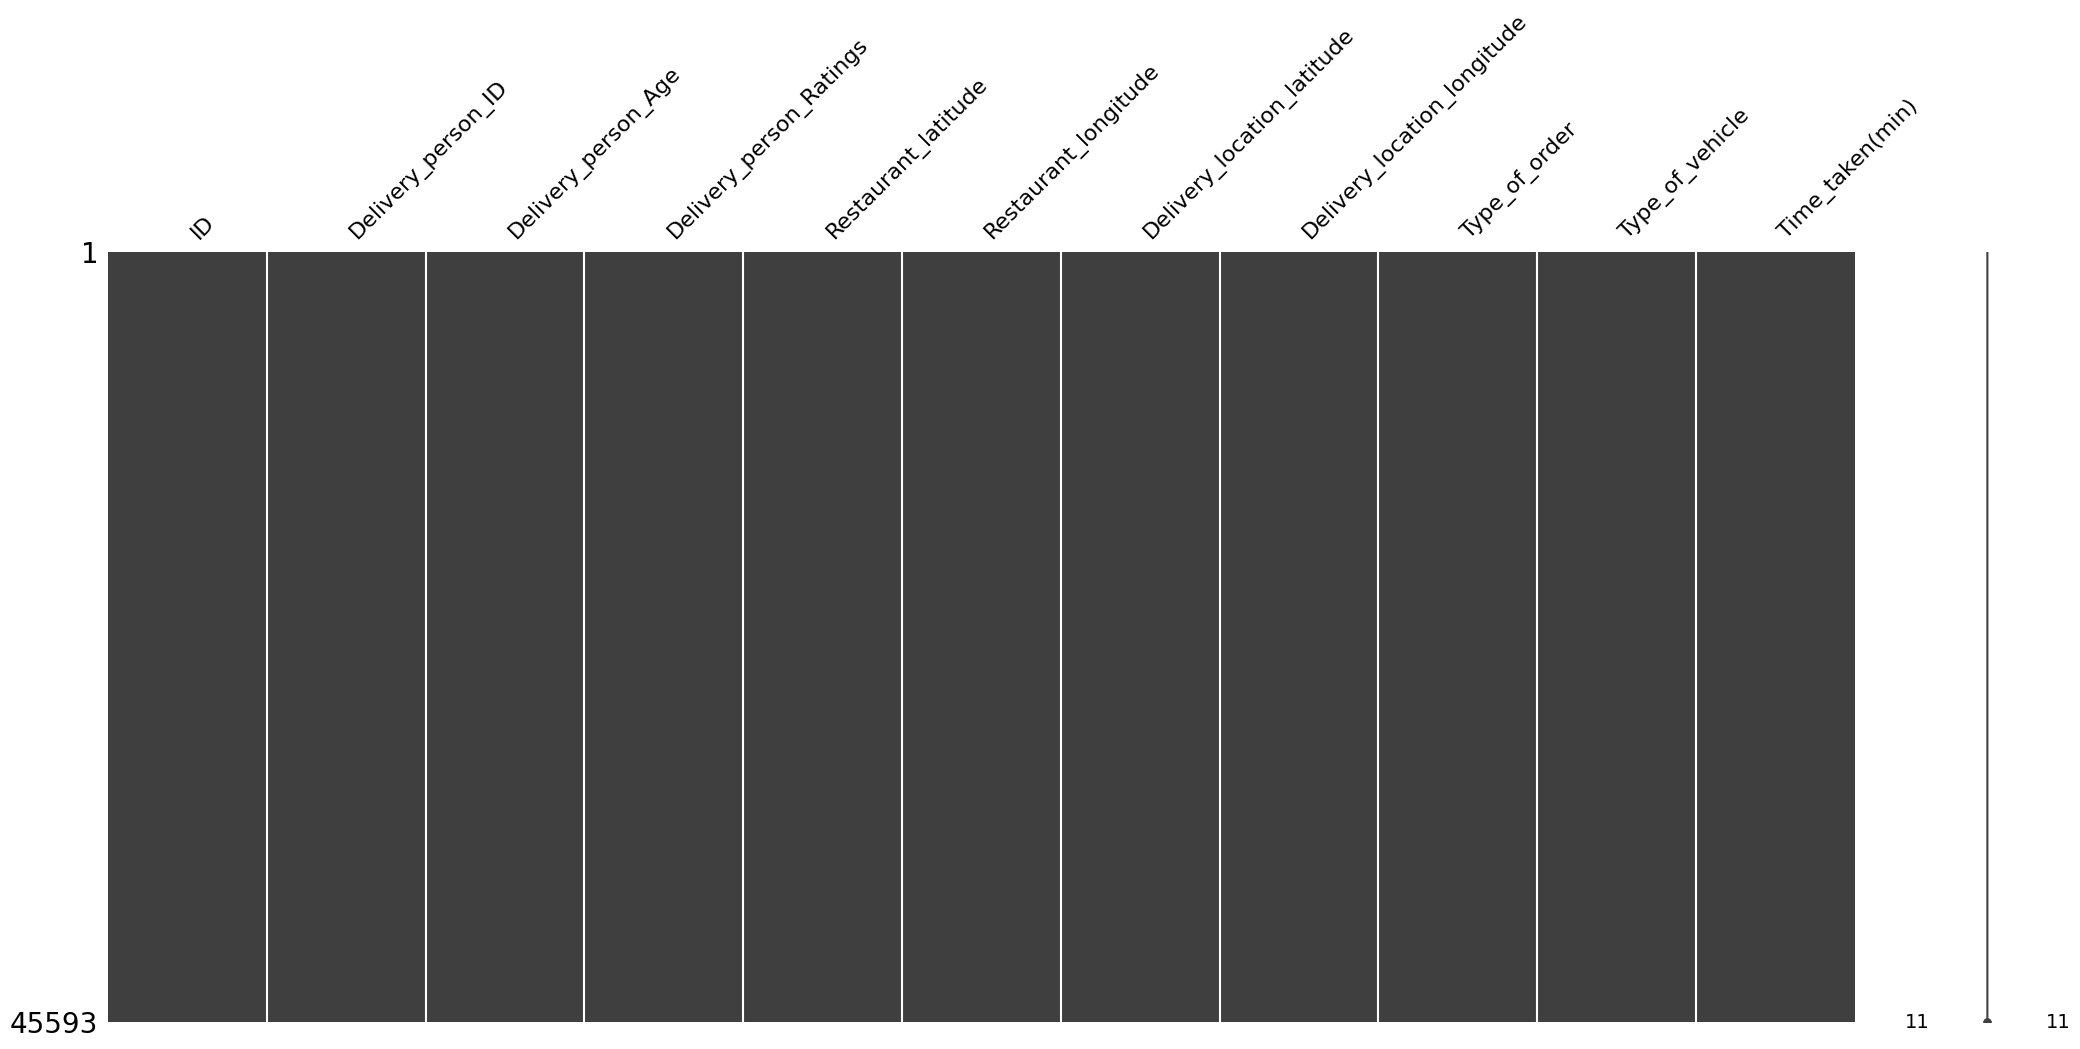

In [30]:
msno.matrix(df)

<Axes: >

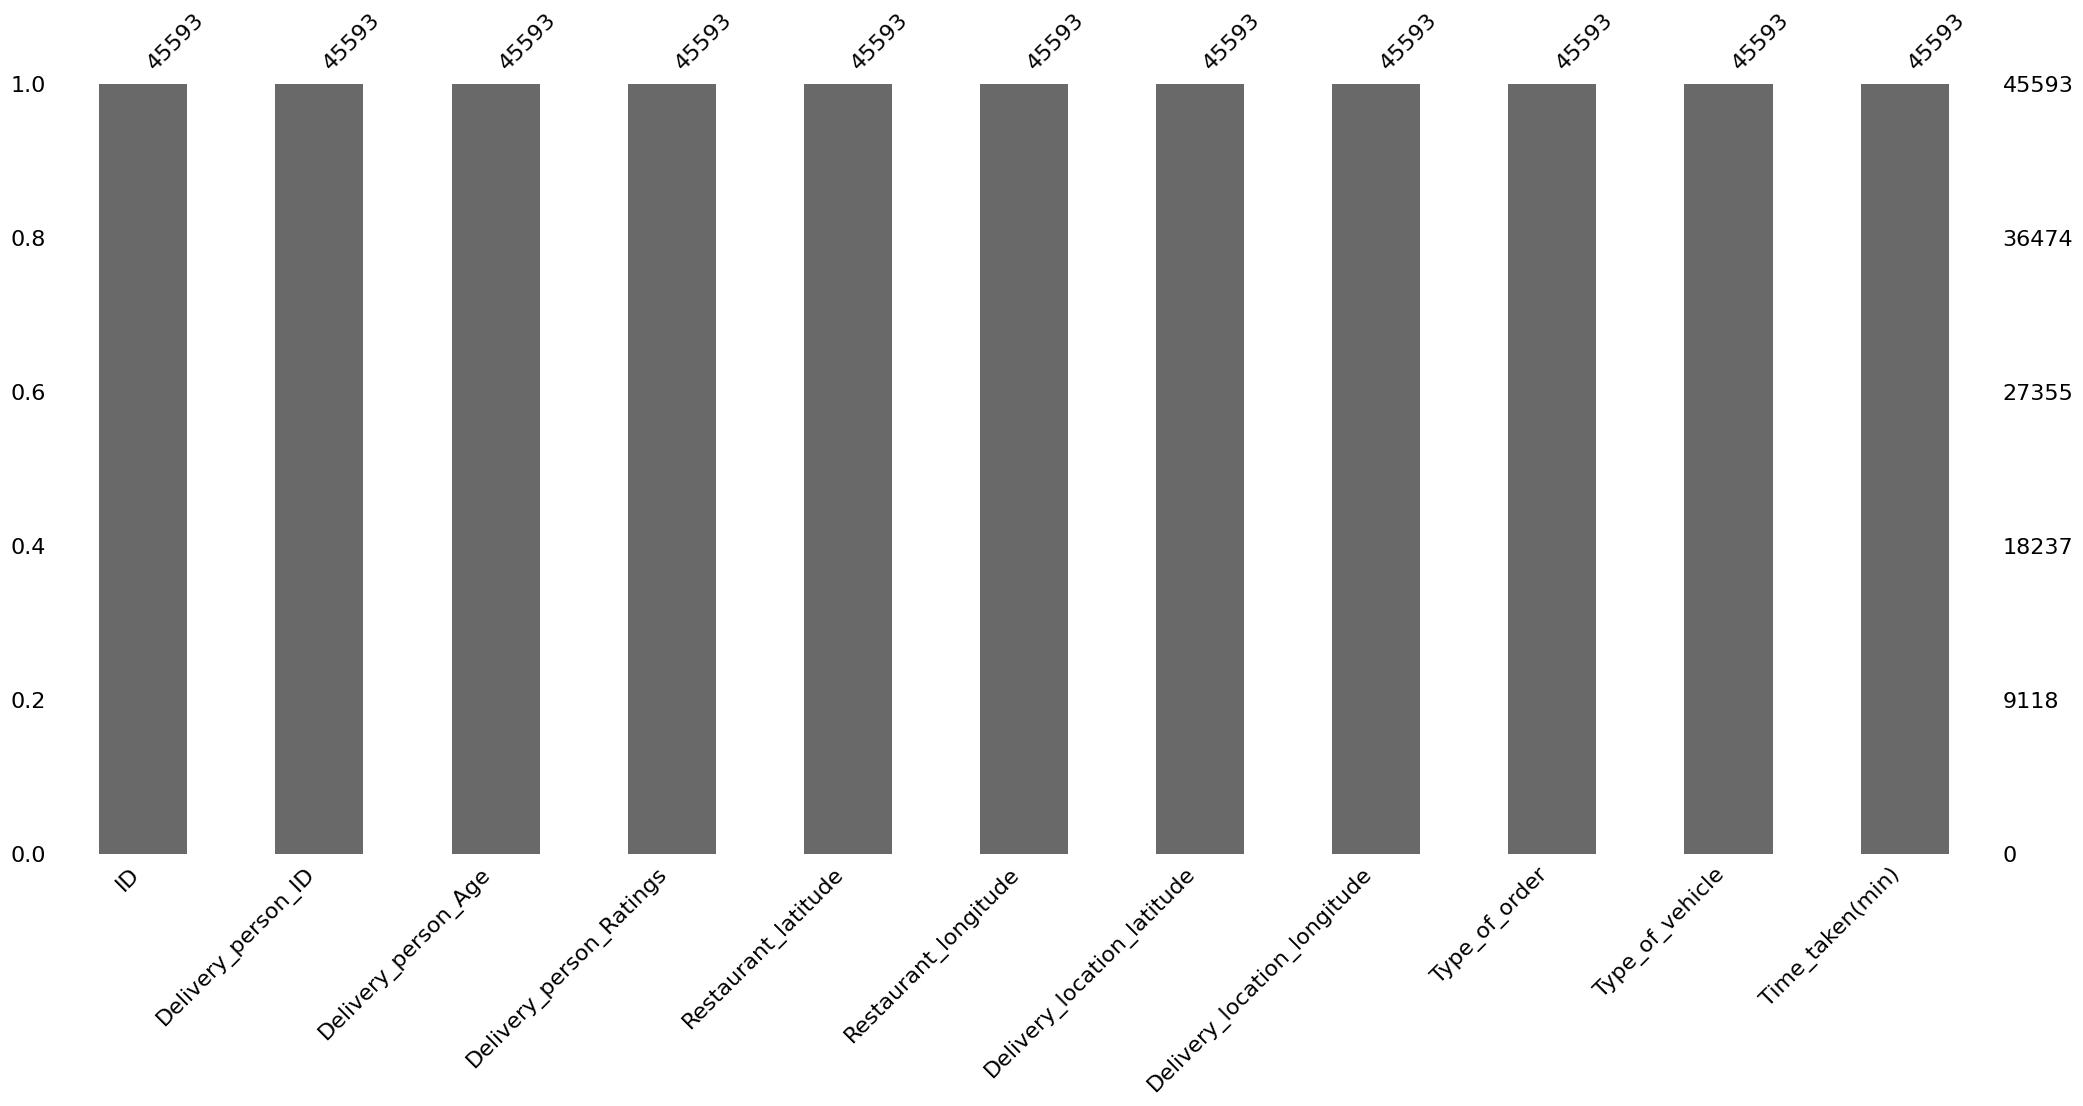

In [31]:
msno.bar(df)

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

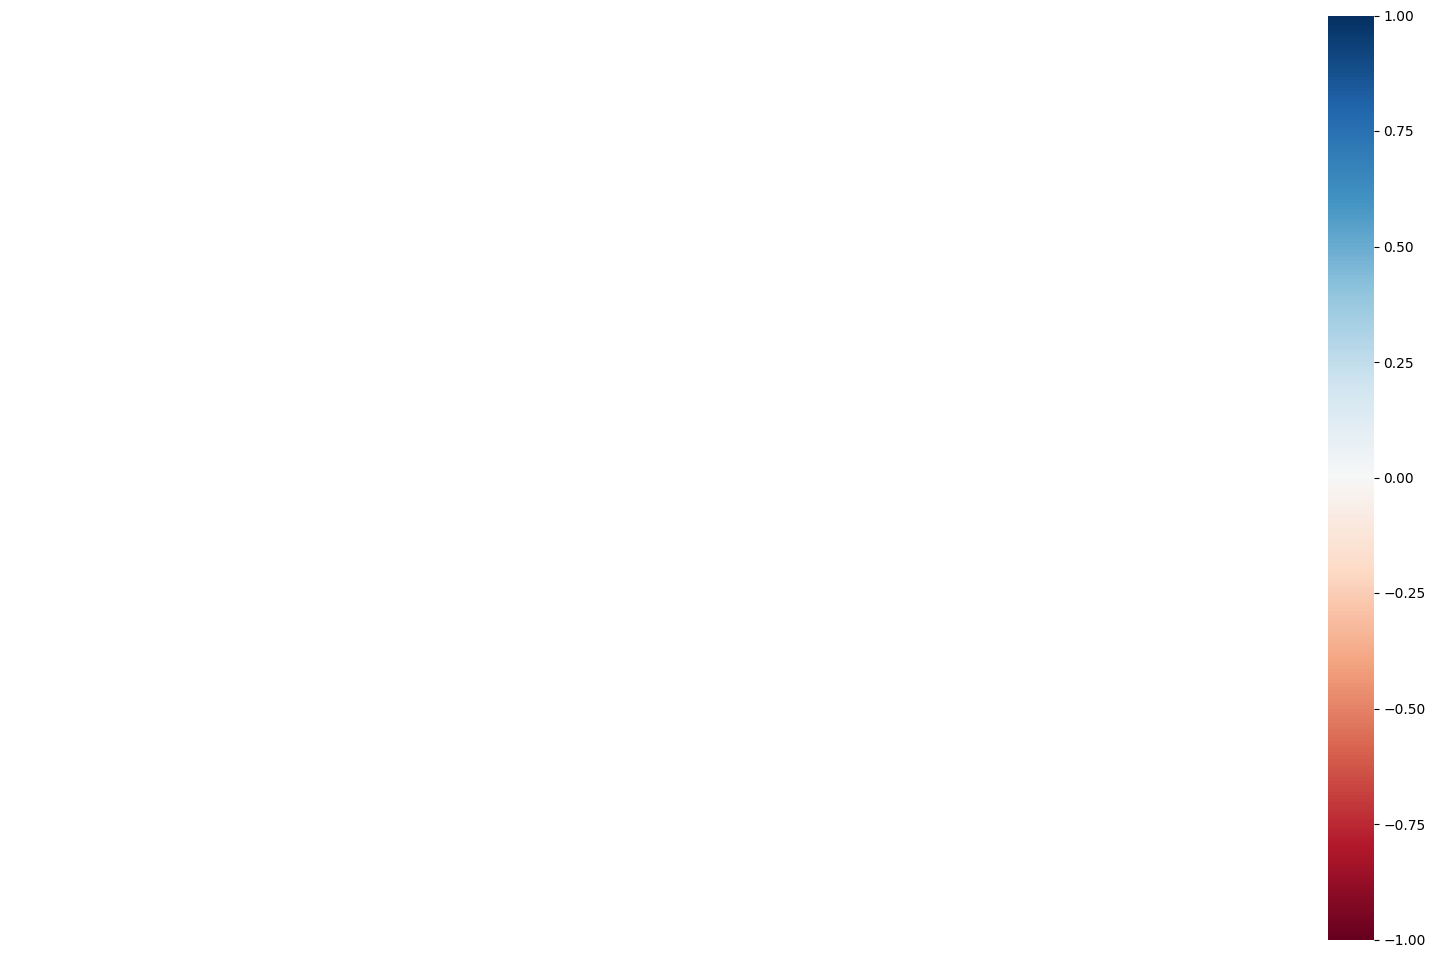

In [32]:
msno.heatmap(df)

### Dendrogram

d:\FInal project\Project 2\Food Delivery Time Prediction API\.venv\lib\site-packages\scipy\cluster\hierarchy.py:2823: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

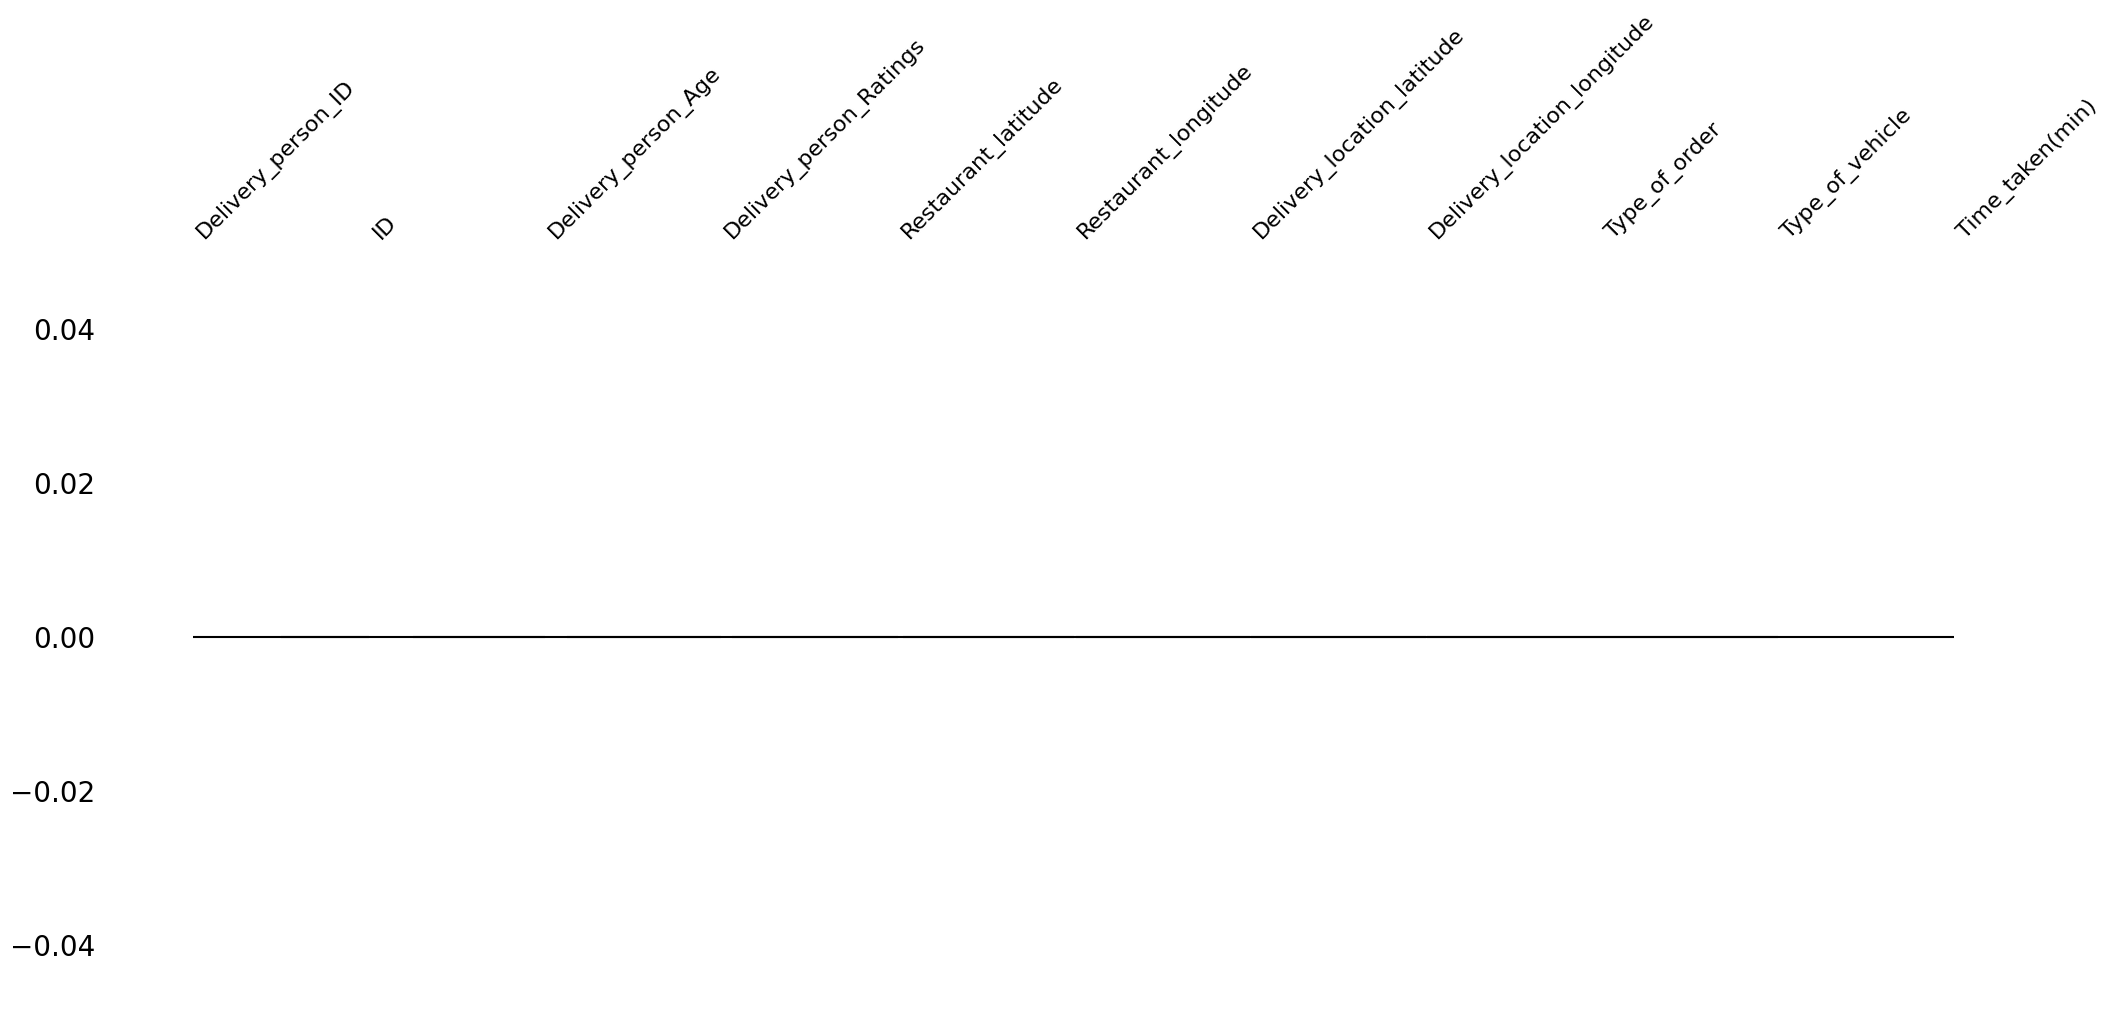

In [33]:
msno.dendrogram(df)

In [34]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Type_of_order',
 'Type_of_vehicle',
 'Time_taken(min)']

In [35]:
import pandas as pd

def change_column_names(data: pd.DataFrame) -> pd.DataFrame:
    return (
        data
        .rename(columns=str.lower)
        .rename(columns={
            "delivery_person_id": "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_taken(min)": "time_taken"
        })
    )


In [36]:
df = change_column_names(df)

In [37]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [39]:
df.drop(columns=["id","rider_id"]).duplicated().sum()

np.int64(28)

In [ ]:
df.isna().sum()

id                             0
delivery_person_id             0
age                            0
ratings                        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
type_of_order                  0
type_of_vehicle                0
time_taken(min)                0
dtype: int64

In [40]:
df['id'].nunique()

45355

In [41]:
df['rider_id'].nunique()

1320

In [42]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [43]:
df['rider_id'].value_counts()

rider_id
PUNERES01DEL01      67
JAPRES11DEL02       67
VADRES08DEL02       66
RANCHIRES02DEL01    66
HYDRES04DEL02       66
                    ..
BHPRES15DEL03        7
GOARES01DEL03        7
KOLRES09DEL03        6
KOCRES16DEL03        6
BHPRES010DEL03       5
Name: count, Length: 1320, dtype: int64

In [45]:
(
    df['rider_id']
    .str.split("RES")
    .str.get(0)
    .rename("City_name")
)

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City_name, Length: 45593, dtype: object

# Age

In [46]:
df['age'].dtype

dtype('int64')

In [47]:
df['age'].astype(float).describe()

count    45593.000000
mean        29.544075
std          5.696793
min         15.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         50.000000
Name: age, dtype: float64

Minimum Rider age of 15 is concerning

Investigate further what type of transport is he using?

<Axes: ylabel='age'>

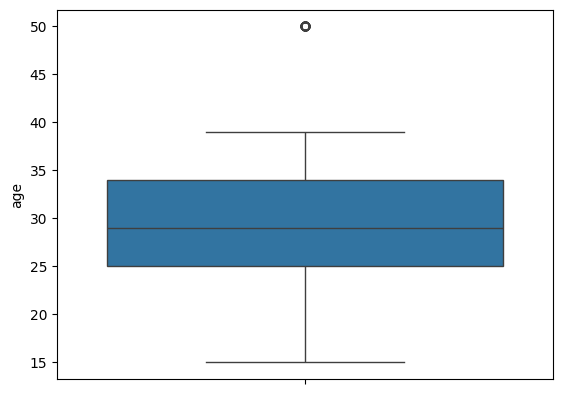

In [48]:
sns.boxplot(df['age'].astype(float))

In [49]:
# rows of data where rider age is less than 18(minor)


minors_data = df.loc[df['age'].astype('float') < 18]

minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken
2387,564,JAPRES15DEL03,15,1.0,-26.891191,75.802083,26.981191,75.892083,Meal,motorcycle,15
2905,CD0,INDORES010DEL03,15,1.0,22.750040,75.902847,22.810040,75.962847,Snack,scooter,29
2951,91A,SURRES17DEL03,15,1.0,21.149569,72.772697,21.209569,72.832697,Buffet,bicycle,20
5902,474,CHENRES15DEL03,15,1.0,13.026286,80.275235,13.056286,80.305235,Drinks,bicycle,25
9156,73F,BANGRES05DEL01,15,1.0,12.970324,77.645748,13.080324,77.755748,Buffet,motorcycle,34
10900,1B49,MUMRES14DEL02,15,1.0,19.181300,72.836191,19.231300,72.886191,Buffet,motorcycle,39
11125,40B,SURRES12DEL01,15,1.0,-21.183434,-72.814492,21.193434,72.824492,Meal,scooter,27
12093,523,INDORES03DEL02,15,1.0,22.751857,75.866699,22.801857,75.916699,Buffet,bicycle,28
15124,18B0,RANCHIRES02DEL01,15,1.0,0.000000,0.000000,0.070000,0.070000,Meal,bicycle,21
15927,550,CHENRES08DEL02,15,1.0,13.022394,80.242439,13.072394,80.292439,Snack,bicycle,17


1. The star ratings of all the riders is 1.
2. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
3. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

In [50]:
minor_index = minors_data.index.tolist()

len(minor_index)

38

In [51]:
df['ratings'].dtype

dtype('float64')

In [52]:
df['ratings'].astype(float).describe()

count    45593.000000
mean         4.632367
std          0.327708
min          1.000000
25%          4.600000
50%          4.700000
75%          4.800000
max          6.000000
Name: ratings, dtype: float64


6 Star rating is possibly a data error

<Axes: ylabel='ratings'>

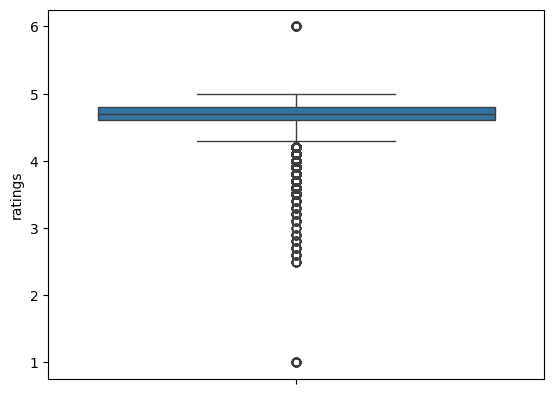

In [53]:
sns.boxplot(df['ratings'].astype(float))

1. The Minors data have ratings as 1 which seems like an anomaly if we generally consider the ratings column distribution.

2. The rating of 6 is also one another anomaly in the data as maximum ratings are 5 and not more than that

* Has to be investigated
* If data is problematic than fixing or removing is an option

In [54]:
# rows where the star rating is 6

six_star_data = df.loc[df['ratings'] == 6]

len(six_star_data)

53

In [55]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken
3586,46D,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,Meal,electric_scooter,25
4714,493,HYDRES17DEL01,50,6.0,-17.451976,-78.385883,17.561976,78.495883,Snack,bicycle,27
5169,4F2,JAPRES08DEL01,50,6.0,-26.910262,-75.783013,27.020262,75.893013,Drinks,scooter,20
5362,430,BANGRES19DEL01,50,6.0,12.914264,77.678400,13.024264,77.788400,Meal,electric_scooter,18
5651,BEF 1.00,AGRRES13DEL02,50,6.0,-27.159795,-78.042990,27.209795,78.092990,Drinks,scooter,20
6394,427,JAPRES06DEL02,50,6.0,26.911927,75.797282,27.041927,75.927282,Meal,electric_scooter,20
7031,3EB,MYSRES15DEL02,50,6.0,-12.352058,-76.606650,12.372058,76.626650,Buffet,scooter,14
7681,D42,VADRES09DEL01,50,6.0,0.000000,0.000000,0.010000,0.010000,Meal,bicycle,22
9499,3F0,BANGRES010DEL01,50,6.0,12.933298,77.614293,13.003298,77.684293,Drinks,scooter,17
9535,3EF,RANCHIRES13DEL01,50,6.0,-23.374989,-85.335486,23.444989,85.405486,Snack,bicycle,32


In [56]:
six_star_index = six_star_data.index.tolist()

Investigate further before action

Data removal seems logical at this stage.

Location Columns

In [57]:
location_columns = df.columns[4:8].tolist()

location_columns

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [58]:
location_subset = df.loc[:,location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


Valid values for lat and long

India lies to the north of the equator between 6° 44′ and 35° 30′ north latitude and 68° 7′ and 97° 25′ east longitude.

In [59]:
location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [60]:
lower_bound_lat = 6.44
lower_bound_long = 68.70

In [61]:

# rows of data where latitude and longitude values are below the bounds

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_location_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].sample(50)

KeyError: 'delivery_location_latitude'

In [62]:
location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].shape[0]

4071

In [63]:
location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

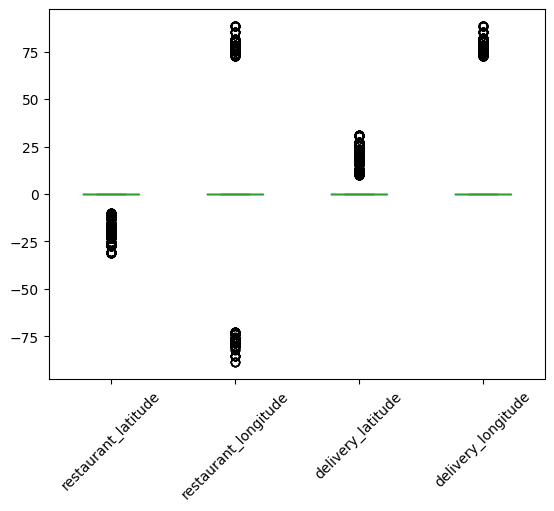

In [64]:
# boxplots for all the anomalies

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

Negative Values are correct just we have to take absolute

While calculating the distances we can assign null values to these erroneous data points and then impute the values using advanced imputation techniques

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

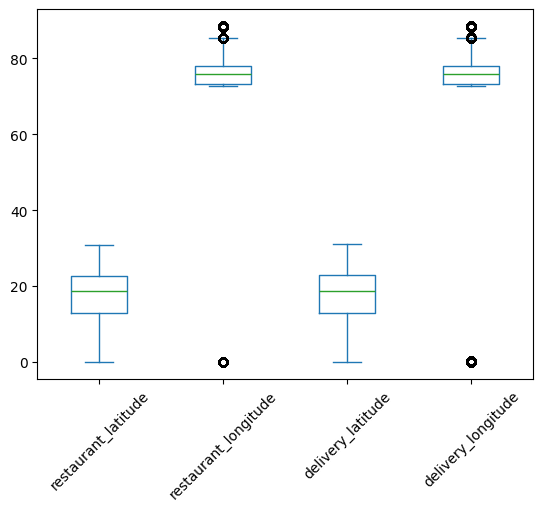

In [65]:
# taking the absolute values

(
    location_subset.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [67]:
(
    location_subset.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)]
    .shape[0]

)

3640

In [68]:
location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [71]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location_subset.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.nan, data[col].values)
            )
            for col in location_columns
        })
    )

In [72]:
clean_lat_long(df).isna().sum()

id                         0
rider_id                   0
age                        0
ratings                    0
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
type_of_order              0
type_of_vehicle            0
time_taken                 0
dtype: int64

In [74]:
df.columns.tolist()

['id',
 'rider_id',
 'age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'type_of_order',
 'type_of_vehicle',
 'time_taken']

# Time Taken

In [75]:
df['time_taken'].dtype

dtype('int64')

# Perform Cleaning and Feature Building

In [76]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'type_of_order', 'type_of_vehicle', 'time_taken'],
      dtype='object')

In [77]:
def data_cleaning(data: pd.DataFrame) -> pd.DataFrame:
    return (
        data
        .drop(columns=["id"])
        .drop(index=minor_index )
        .drop(index=six_star_index )
        .replace("NaN ",np.nan)
        .assign(
                city_name = lambda x: x['rider_id'].str.split("RES").str.get(0),

                age = lambda x: x['age'].astype(float),

                ratings = lambda x: x['ratings'].astype(float),

                restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),

                restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
                delivery_latitude = lambda x: x['delivery_latitude'].abs(),
                delivery_longitude = lambda x: x['delivery_longitude'].abs(),
                time_taken = lambda x: x['time_taken'].astype(float)
                
        )
    )

In [78]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [79]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken,city_name
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24.0,INDO
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33.0,BANG
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26.0,BANG
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21.0,COIMB
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30.0,CHEN
...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32.0,JAP
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36.0,AGR
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16.0,CHEN
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26.0,COIMB


In [80]:
location_subset.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [81]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [83]:
cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken,city_name,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24.0,INDO,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33.0,BANG,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26.0,BANG,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21.0,COIMB,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30.0,CHEN,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32.0,JAP,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,Buffet,motorcycle,36.0,AGR,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16.0,CHEN,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26.0,COIMB,6.232393


In [84]:
cleaned_data['age'].agg(["min","max"])

min    20.0
max    39.0
Name: age, dtype: float64

In [85]:
cleaned_data['ratings'].agg(["min","max"])

min    2.5
max    5.0
Name: ratings, dtype: float64

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


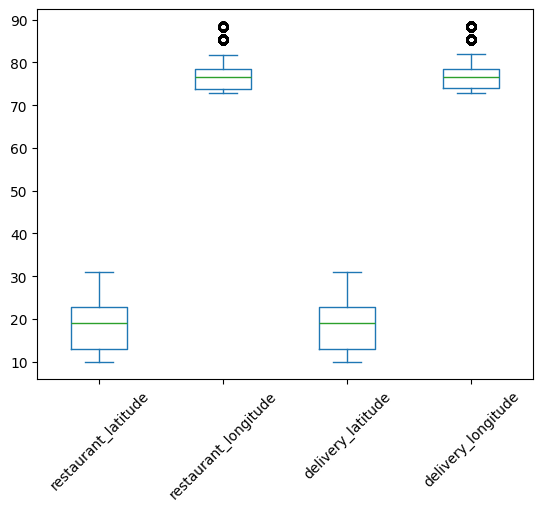

In [86]:
# location columns

cleaned_data[location_columns].plot(kind="box")

plt.xticks(rotation=45)

display(cleaned_data[location_columns].describe())

In [87]:
# values in categorical columns

cat_cols = cleaned_data.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    print(f"For {col} unique values are: {cleaned_data[col].unique()}",end="\n\n")

For rider_id unique values are: ['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']

For type_of_order unique values are: ['Snack ' 'Drinks ' 'Buffet ' 'Meal ']

For type_of_vehicle unique values are: ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']

For city_name unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']



<Axes: >

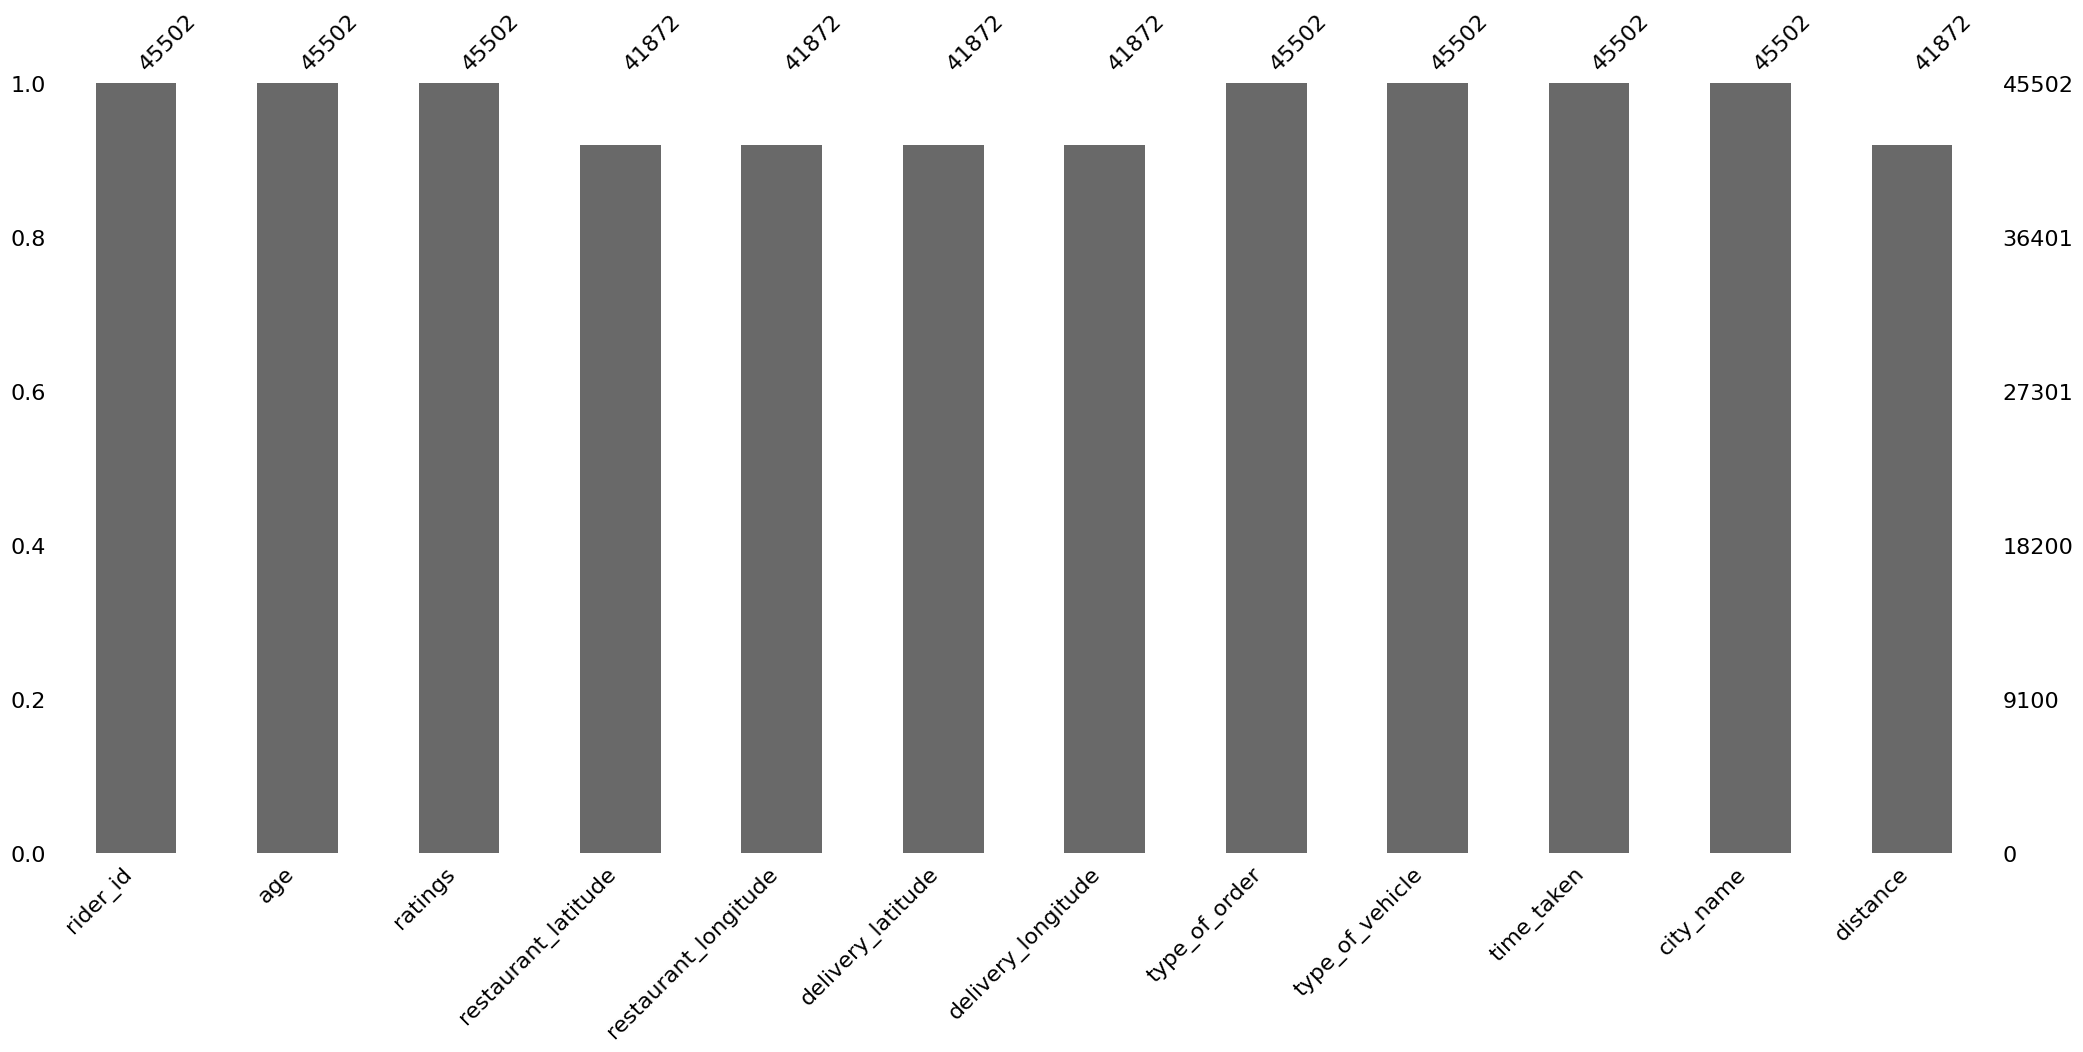

In [88]:
msno.bar(cleaned_data)

<Axes: >

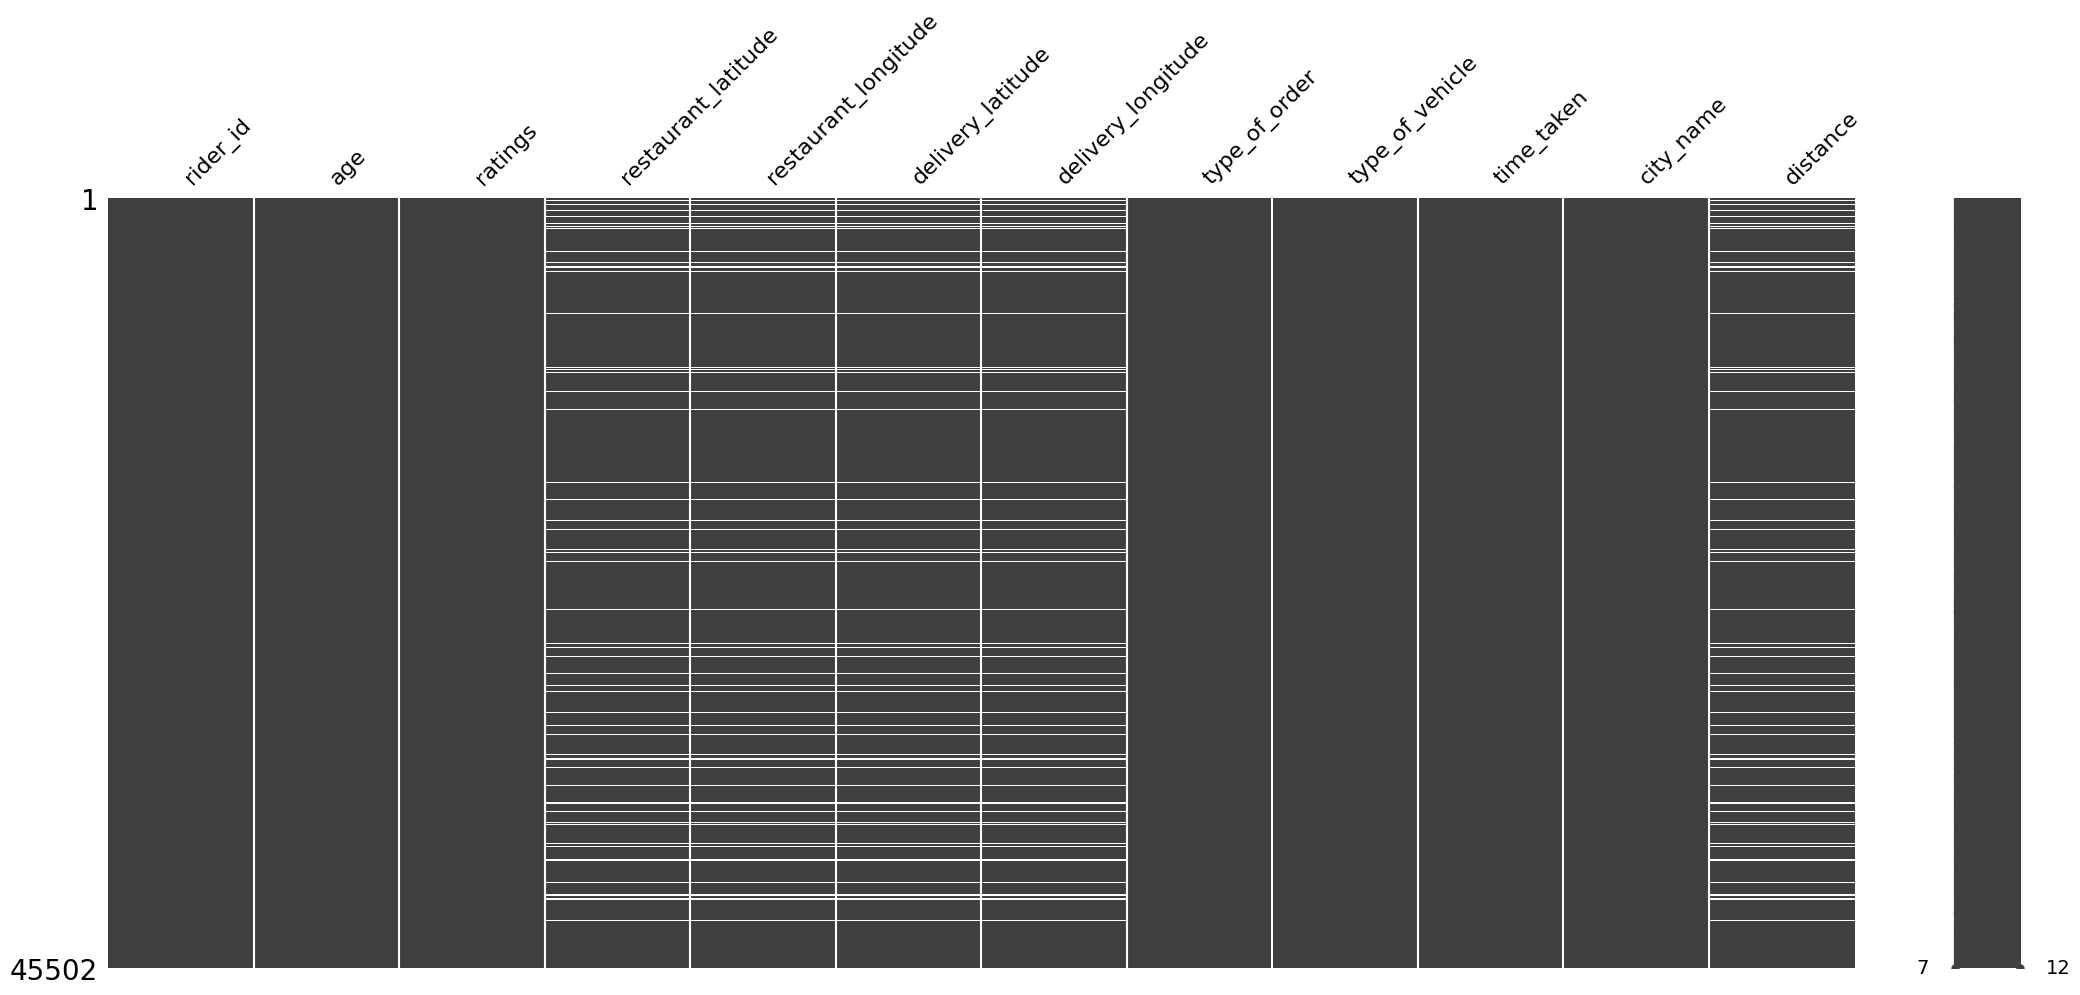

In [89]:
msno.matrix(cleaned_data)

<Axes: >

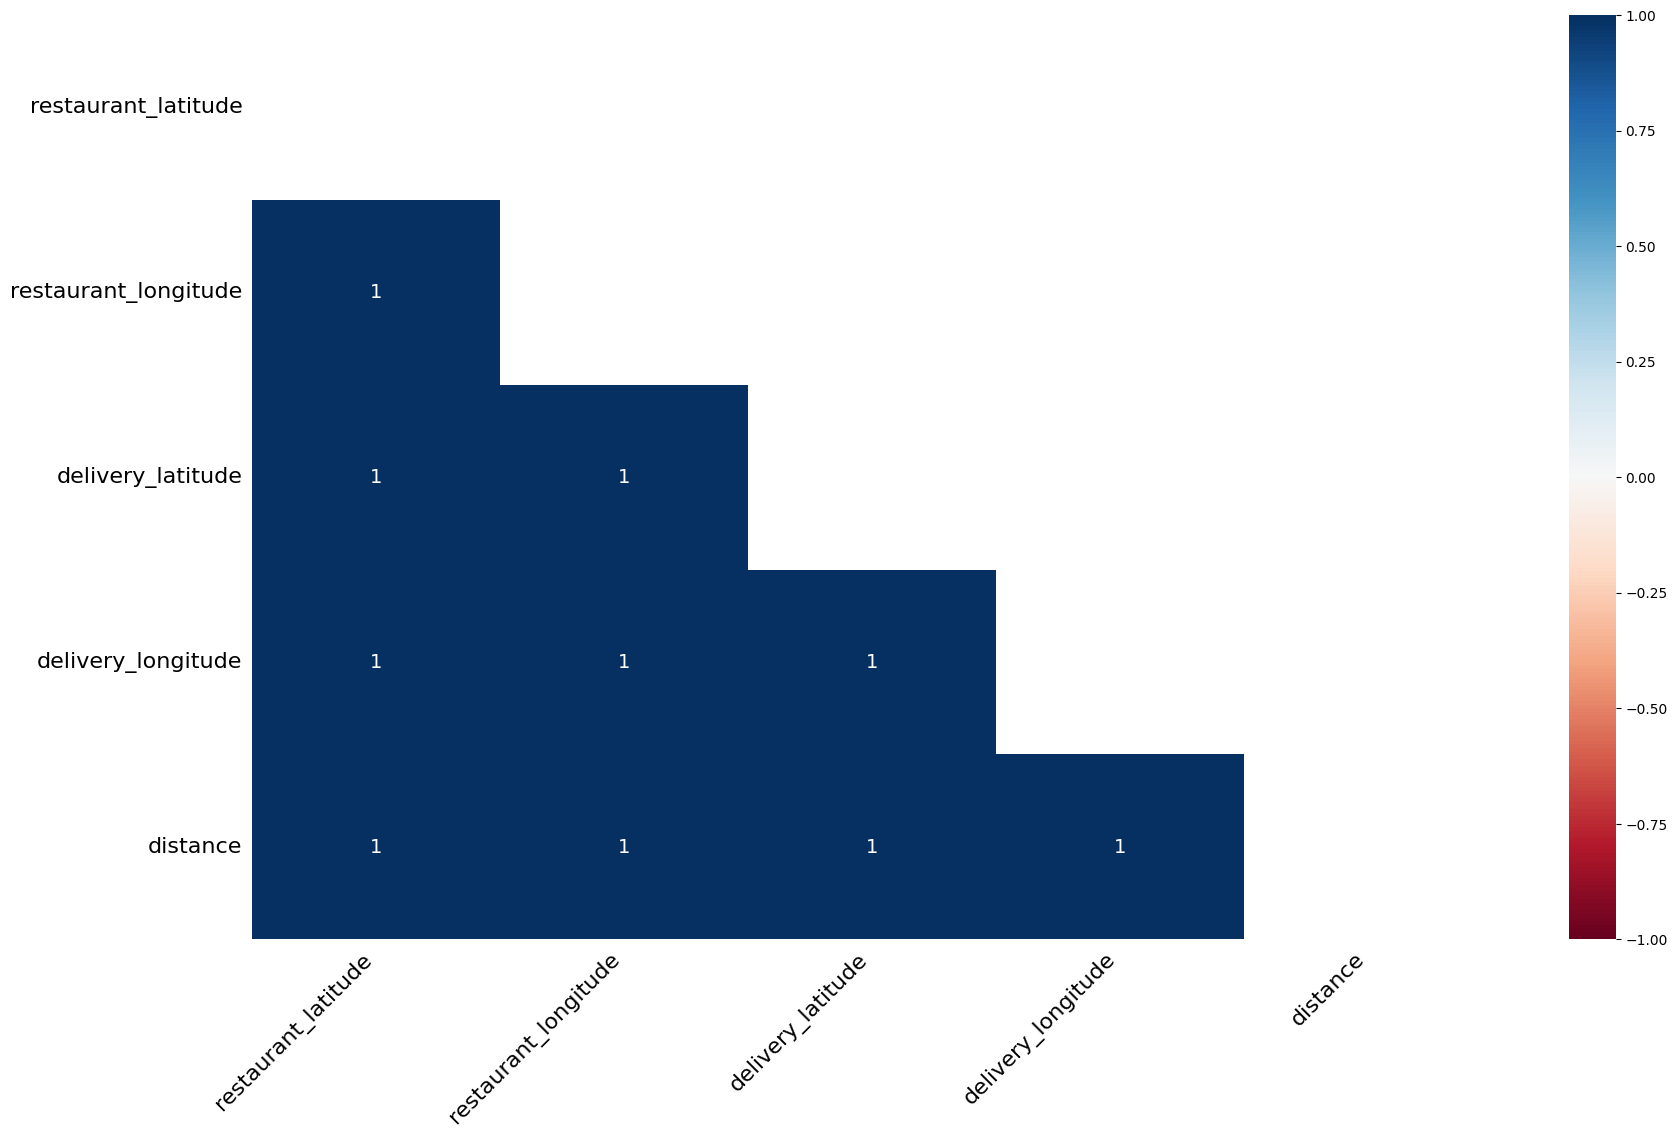

In [90]:
msno.heatmap(cleaned_data)

Save Cleaned Data

In [91]:
cleaned_data.to_csv("cleaned_data.csv",index=False)

In [92]:
cleaned_data_load = pd.read_csv("cleaned_data.csv")

In [93]:
cleaned_data_load.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
type_of_order            object
type_of_vehicle          object
time_taken              float64
city_name                object
distance                float64
dtype: object

In [94]:
cleaned_data_load

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken,city_name,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24.0,INDO,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33.0,BANG,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26.0,BANG,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21.0,COIMB,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30.0,CHEN,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32.0,JAP,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,Buffet,motorcycle,36.0,AGR,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16.0,CHEN,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26.0,COIMB,6.232393
